# 해당 파일 설명

이 코드를 실행하기 위한 파일, /convert 경로에 다음의 파일이 필요합니다.

1. plant_train_all_weather_feature_add_cluster.csv
2. date_trend_point.csv


## 추가 설명

Train data 의 모든 변수를 가지고 cond_loc를 예측하는 모델을 검증합니다.

# 1. Google drive Mount

In [ ]:
from google.colab import auth
auth.authenticate_user()

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


# 2. Define Directory

In [ ]:
# 사용하기 전 변경해주어야 하는 파라미터
# BASE_WORKING_DIR = "/content/gdrive/My Drive/weather_bigcontest/4_code/"
BASE_WORKING_DIR = "/content/gdrive/My Drive/weather_bigcontest/4_code/"
USERNAME = "park"

In [ ]:
import os
# 사용하는 디렉토리 정의
DATA_BASE_PATH = os.path.join(BASE_WORKING_DIR, "data")
DATA_RAW_PATH = os.path.join(DATA_BASE_PATH, "raw")
DATA_EXPORT_PATH = os.path.join(DATA_BASE_PATH, "export")
DATA_CONV_USER_PATH = os.path.join(DATA_BASE_PATH, USERNAME)
DATA_CONV_PATH = os.path.join(DATA_BASE_PATH, "converted")
MODEL_PATH = os.path.join(BASE_WORKING_DIR, "model")
RESULT_PATH = os.path.join(BASE_WORKING_DIR, "result")

WORKING_DIR = os.path.join(BASE_WORKING_DIR, USERNAME)

print('Current Work Directory :',  os.getcwd(), '\n')
print('Username :',  USERNAME, '\n')

print("DATA_BASE_PATH : ", DATA_BASE_PATH)
print("DATA_RAW_PATH : ", DATA_RAW_PATH)
print("DATA_EXPORT_PATH : ", DATA_EXPORT_PATH)
print("DATA_CONV_USER_PATH : ", DATA_CONV_USER_PATH)
print("DATA_CONV_PATH : ", DATA_CONV_PATH)

print("MODEL_PATH : ", MODEL_PATH)

print("RESULT_PATH : ", RESULT_PATH)

print("WORKING_DIR : ", WORKING_DIR)


Current Work Directory : /content 

Username : park 

DATA_BASE_PATH :  /content/gdrive/My Drive/weather_bigcontest/4_code/data
DATA_RAW_PATH :  /content/gdrive/My Drive/weather_bigcontest/4_code/data/raw
DATA_EXPORT_PATH :  /content/gdrive/My Drive/weather_bigcontest/4_code/data/export
DATA_CONV_USER_PATH :  /content/gdrive/My Drive/weather_bigcontest/4_code/data/park
DATA_CONV_PATH :  /content/gdrive/My Drive/weather_bigcontest/4_code/data/converted
MODEL_PATH :  /content/gdrive/My Drive/weather_bigcontest/4_code/model
RESULT_PATH :  /content/gdrive/My Drive/weather_bigcontest/4_code/result
WORKING_DIR :  /content/gdrive/My Drive/weather_bigcontest/4_code/park


In [ ]:
# 데이터 무엇이 있는지 확인하자.
# 아래 코드를 수행하게 되면, "../input/"에서 리눅스 명령어 "ls"를 수행한 결과를 보여주게 된다. 이 때 나온 binary code를 "utf8"로 디코딩해서 보여준다.
from subprocess import check_output
print("===== Raw Data List =====\n", check_output(["ls", DATA_RAW_PATH]).decode("utf8"))
print("===== Export Data List =====\n" ,check_output(["ls", DATA_EXPORT_PATH]).decode("utf8"))
print("===== Converted User Data List =====\n" ,check_output(["ls", DATA_CONV_USER_PATH]).decode("utf8"))
print("===== Converted Data List =====\n" ,check_output(["ls", DATA_CONV_PATH]).decode("utf8"))
print("===== Model List =====\n" ,check_output(["ls", MODEL_PATH]).decode("utf8"))
print("===== Result file List =====\n" ,check_output(["ls", RESULT_PATH]).decode("utf8"))

===== Raw Data List =====
 plant1_train.csv
plant2_train.csv
plant2_train.gsheet
plant_test.csv
submit.csv
submit.gsheet

===== Export Data List =====
 dangjin_aws
seosan_asos
sinpyeong_aws
songak_forecast
songak_local
songsan_forecast
songsan_local

===== Converted User Data List =====
 backup_0.96model
data_all.csv
data_all_out.csv
data_all_out_in.csv
date_trend.csv
date_trend_point.csv
ExtraTreesClassifier_th_10.csv
GradientBoostingClassifier_all_feature_th_40.csv
lastplus_th_10.csv
last_th_08.csv
last_th_10.csv
model
model_cond_all.pkl
model_cond_all_plus_.pkl
model_hum_in.pkl
model_hum_out_loc.pkl
model_tem_coil.pkl
model_tem_in.pkl
model_tem_out_loc.pkl
plant1_by_loc.csv
plant1_by_loc.gsheet
plant2_by_loc.csv
plant_test_all_weather_feature_add_cluster_add_out.csv
plant_test_all_weather_feature_add_cluster_add_out_in.csv
plant_test_all_weather_feature_add_cluster_add_out_in.gsheet
plant_train_all_weather_feature_add_cluster.csv
predict.csv
RandomForestClassifier_th_10.csv
result.c

# 4. Import Library

In [ ]:
# 기본 데이터 라이브러리 로드
import sys # 시스템 파라미터에 접근할 수 있게 도와준다.
print("Python version: {}". format(sys.version))

import pandas as pd # 데이터 정제에 도움을 주는 라이브러리
print("pandas version: {}". format(pd.__version__))

import matplotlib # 매트랩에서 사용하는 시각화 도구를 사용할 수 있게 도와주는 시각화 도구
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np # 행렬 계산을 위해 필요한 라이브러리
print("NumPy version: {}". format(np.__version__))

import scipy as sp # 수학 관련 함수가 내장된 라이브러리
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display # 주피터 노트북에서 예쁘게 시각화 해주는 도구
print("IPython version: {}". format(IPython.__version__)) 

import sklearn # 각종 통계 도구와 머신 러닝 알고리즘이 내장되어 있는 라이브러리
print("scikit-learn version: {}". format(sklearn.__version__))

# 파이썬 내장 라이브러리
import random
import time
import os
from datetime import datetime, timedelta
from dateutil.relativedelta import relativedelta
import copy


# Jupyter Notebook 이나 ipython 을 사용하다보면 향후 버전이 올라갈 때 변경될 사항 등을 알려주는 경고 메시지(warning message)를 뜨지 않게 해준다.
import warnings
warnings.filterwarnings('ignore')
print('-'*25)

Python version: 3.6.9 (default, Apr 18 2020, 01:56:04) 
[GCC 8.4.0]
pandas version: 1.0.5
matplotlib version: 3.2.2
NumPy version: 1.18.5
SciPy version: 1.4.1
IPython version: 5.5.0
scikit-learn version: 0.22.2.post1
-------------------------


In [ ]:
# 모델링 라이브러리, 수학 계산 툴 로드
# 일반적인 모델링 라이브러리
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier
import lightgbm

# 모델링 시 헬퍼 함수들
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics

# interpolation 함수
import scipy.interpolate as spi

# model load
import pickle
from sklearn.externals import joblib

# 시각화 도구
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix

# 시각화 도구 default 세팅
# 주피터 노트북에서 plot 결과를 볼 수 있게 해준다.
%matplotlib inline
mpl.style.use('ggplot') # matplotlib에서 plot되는 결과를 선택할 수 있다.
sns.set_style('white') # seaborn에서 사용할 style을 설정할 수 있다.
pylab.rcParams['figure.figsize'] = 12,8 # plot의 크기와 선 등의 기본 값을 설정할 수 있다.

# 시각화 Style 설정하기
# print(plt.style.available)
# ['bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark-palette', 'seaborn-dark', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'seaborn', 'Solarize_Light2', 'tableau-colorblind10', '_classic_test']

plt.style.use(['fivethirtyeight'])
sns.set_style('darkgrid')

# 5. Get the Data

## 1. plant data 가져오기

In [ ]:
# plant 데이터 
data_train = pd.read_csv(os.path.join(DATA_CONV_PATH, "plant_train_all_weather_feature_add_cluster.csv"))

# unnamed: 0 제거
data_train.drop(['Unnamed: 0'], axis='columns', inplace=True)

# date 변수 str -> datetime.date()
data_train['date'] = data_train['date'].apply(lambda x : datetime.strptime(x + " 00:00:00", '%Y-%m-%d %H:%M:%S').date()) 

In [ ]:
# train 데이터 info
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 350366 entries, 0 to 350365
Data columns (total 48 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   mea_ddhr               350366 non-null  object 
 1   plant                  350366 non-null  float64
 2   loc                    350366 non-null  float64
 3   tem_in                 350366 non-null  float64
 4   hum_in                 350366 non-null  float64
 5   tem_coil               350366 non-null  float64
 6   tem_out_loc            350366 non-null  float64
 7   hum_out_loc            350366 non-null  float64
 8   cond_loc               350366 non-null  float64
 9   date                   350366 non-null  object 
 10  time                   350366 non-null  float64
 11  dangjin-ta             350366 non-null  float64
 12  dangjin-hm             350366 non-null  float64
 13  dangjin-ws             350366 non-null  float64
 14  dangjin-rn             350366 non-nu

In [ ]:
# train 데이터 NULL 제거 후 info
data_train.dropna(inplace=True)
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 350366 entries, 0 to 350365
Data columns (total 48 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   mea_ddhr               350366 non-null  object 
 1   plant                  350366 non-null  float64
 2   loc                    350366 non-null  float64
 3   tem_in                 350366 non-null  float64
 4   hum_in                 350366 non-null  float64
 5   tem_coil               350366 non-null  float64
 6   tem_out_loc            350366 non-null  float64
 7   hum_out_loc            350366 non-null  float64
 8   cond_loc               350366 non-null  float64
 9   date                   350366 non-null  object 
 10  time                   350366 non-null  float64
 11  dangjin-ta             350366 non-null  float64
 12  dangjin-hm             350366 non-null  float64
 13  dangjin-ws             350366 non-null  float64
 14  dangjin-rn             350366 non-nu

## IN, OUT 클러스터 적용하기

In [ ]:
# date 별로 in, out 클러스터링 데이터
data_cluster = pd.read_csv(os.path.join(DATA_CONV_PATH, "date_trend_point.csv"))

data_cluster.drop(['Unnamed: 0'], axis='columns', inplace=True)

data_cluster['date'] = data_cluster['date'].apply(lambda x : datetime.strptime(x + " 00:00:00", '%Y-%m-%d %H:%M:%S').date()) 

data_cluster

,date,plant,loc,tem_out_loc-trend,hum_out_loc-trend,tem_in-trend,hum_in-trend,tem_coil-trend,tem_out_loc-point,hum_out_loc-point,tem_in-point,hum_in-point,tem_coil-point
0,2016-04-01,1,1,3,1,1,2,2,4,2,2,2,1
1,2016-04-01,1,2,4,1,2,0,2,2,0,3,2,3
2,2016-04-01,1,3,2,2,4,4,3,0,0,0,2,2
3,2016-04-01,2,1,3,0,3,1,1,2,0,3,4,2
4,2016-04-01,2,2,3,1,2,2,1,2,3,0,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8761,2020-03-31,1,2,4,1,3,1,4,4,0,4,2,3
8762,2020-03-31,1,3,2,2,1,0,0,4,0,1,2,2
8763,2020-03-31,2,1,3,0,0,3,0,3,0,1,4,2
8764,2020-03-31,2,2,3,1,4,1,0,3,3,1,3,4


In [ ]:
data_train = pd.merge(data_train, data_cluster, how='left', on = ['date', 'plant', 'loc'])
data_train

,mea_ddhr,plant,loc,tem_in,hum_in,tem_coil,tem_out_loc,hum_out_loc,cond_loc,date,time,dangjin-ta,dangjin-hm,dangjin-ws,dangjin-rn,sinpyeong-ta,sinpyeong-ws,sinpyeong-rn,sinpyeong-lp,sinpyeong-ap,seosan-ta,seosan-hm,seosan-ws,seosan-rn,seosan-dew,seosan-sp,seosan-lp,seosan-ap,seosan-sr,seosan-ss,seosan-ground,songsan-ta,songsan-hm,songsan-ws,songsan-rn,songak-ta,songak-hm,songak-ws,songak-rn,seosan-ta-trend,seosan-hm-trend,seosan-ground-trend,seosan-ta-point,seosan-hm-point,seosan-ground-point,seosan-ta-changed,seosan-hm-changed,seosan-ground-changed,tem_out_loc-trend,hum_out_loc-trend,tem_in-trend,hum_in-trend,tem_coil-trend,tem_out_loc-point,hum_out_loc-point,tem_in-point,hum_in-point,tem_coil-point
0,2016-04-01 00:00:00,1.0,1.0,16.00,24.00,11.00,9.00,42.00,0.0,2016-04-01,0.0,6.800000,41.20,0.300000,0.0,7.2,0.900000,0.0,1013.000000,1015.700000,8.800000,41.000000,1.500000,0.0,-3.700000,4.600000,1012.100000,1015.600000,0.0,0.0,4.000000,14.00,40.000000,0.600000,0.0,13.800000,38.000000,0.400000,0.0,4,4,3,2,1,0,18.696296,56.993994,44.577377,3,1,1,2,2,4,2,2,2,1
1,2016-04-01 00:00:00,1.0,2.0,14.00,23.00,11.00,9.00,42.00,0.0,2016-04-01,0.0,6.800000,41.20,0.300000,0.0,7.2,0.900000,0.0,1013.000000,1015.700000,8.800000,41.000000,1.500000,0.0,-3.700000,4.600000,1012.100000,1015.600000,0.0,0.0,4.000000,14.00,40.000000,0.600000,0.0,13.800000,38.000000,0.400000,0.0,4,4,3,2,1,0,18.696296,56.993994,44.577377,4,1,2,0,2,2,0,3,2,3
2,2016-04-01 00:00:00,1.0,3.0,13.00,32.00,10.00,9.00,42.00,0.0,2016-04-01,0.0,6.800000,41.20,0.300000,0.0,7.2,0.900000,0.0,1013.000000,1015.700000,8.800000,41.000000,1.500000,0.0,-3.700000,4.600000,1012.100000,1015.600000,0.0,0.0,4.000000,14.00,40.000000,0.600000,0.0,13.800000,38.000000,0.400000,0.0,4,4,3,2,1,0,18.696296,56.993994,44.577377,2,2,4,4,3,0,0,0,2,2
3,2016-04-01 03:00:00,1.0,1.0,14.00,28.00,10.00,7.00,59.00,0.0,2016-04-01,180.0,5.200000,52.10,0.200000,0.0,4.7,0.300000,0.0,1012.200000,1014.900000,7.500000,40.000000,0.400000,0.0,-5.200000,4.200000,1011.400000,1014.900000,0.0,0.0,2.800000,19.60,24.000000,0.700000,0.0,20.200001,22.000000,1.000000,0.0,4,4,3,2,1,0,18.696296,56.993994,44.577377,3,1,1,2,2,4,2,2,2,1
4,2016-04-01 03:00:00,1.0,2.0,12.00,32.00,9.00,7.00,59.00,0.0,2016-04-01,180.0,5.200000,52.10,0.200000,0.0,4.7,0.300000,0.0,1012.200000,1014.900000,7.500000,40.000000,0.400000,0.0,-5.200000,4.200000,1011.400000,1014.900000,0.0,0.0,2.800000,19.60,24.000000,0.700000,0.0,20.200001,22.000000,1.000000,0.0,4,4,3,2,1,0,18.696296,56.993994,44.577377,4,1,2,0,2,2,0,3,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
350361,2019-03-31 23:30:00,2.0,2.0,9.05,38.13,9.76,4.57,51.47,0.0,2019-03-31,1410.0,3.000000,51.95,0.500000,0.0,2.8,2.100000,0.0,1021.150000,1023.650000,3.200000,58.500000,1.900000,0.0,-4.100000,4.550000,1020.850000,1024.050000,0.0,0.0,2.000000,8.15,24.500000,4.150000,0.0,8.150000,24.500000,4.150000,0.0,3,2,4,4,4,1,5.397598,46.997998,17.498498,4,2,3,0,3,3,3,1,3,4
350362,2019-03-31 23:30:00,2.0,3.0,8.32,39.13,9.49,4.57,51.47,0.0,2019-03-31,1410.0,3.000000,51.95,0.500000,0.0,2.8,2.100000,0.0,1021.150000,1023.650000,3.200000,58.500000,1.900000,0.0,-4.100000,4.550000,1020.850000,1024.050000,0.0,0.0,2.000000,8.15,24.500000,4.150000,0.0,8.150000,24.500000,4.150000,0.0,3,2,4,4,4,1,5.397598,46.997998,17.498498,4,3,0,3,0,1,3,0,2,1
350363,2019-03-31 23:40:00,2.0,1.0,8.99,37.33,9.15,4.47,53.14,0.0,2019-03-31,1420.0,2.933333,52.30,0.366667,0.0,2.8,2.133333,0.0,1021.166667,1023.666667,3.133333,59.666667,1.666667,0.0,-3.866667,4.633333,1020.866667,1024.066667,0.0,0.0,1.966667,8.50,18.666667,4.433333,0.0,8.500000,18.666667,4.433333,0.0,3,2,4,4,4,1,5.397598,46.997998,17.498498,0,4,4,0,3,3,0,1,4,2
350364,2019-03-31 23:40:00,2.0,2.0,9.02,38.49,9.68,4.47,53.14,0.0,2019-03-31,1420.0,2.933333,52.30,0.366667,0.0,2.8,2.133333,0.0,1021.1666

# Modeling


In [ ]:
# 훈련할 모델
model_cond = dict()

## 1. 사용하는 변수 정의

In [ ]:
# 훈련에 사용되는 변수 정의
remove_list = ['mea_ddhr', 'date', 'cond_loc']
data_columns = list(data_train.columns)
for rmv in remove_list:
  data_columns.remove(rmv)
data_columns

['plant',
 'loc',
 'tem_in',
 'hum_in',
 'tem_coil',
 'tem_out_loc',
 'hum_out_loc',
 'time',
 'dangjin-ta',
 'dangjin-hm',
 'dangjin-ws',
 'dangjin-rn',
 'sinpyeong-ta',
 'sinpyeong-ws',
 'sinpyeong-rn',
 'sinpyeong-lp',
 'sinpyeong-ap',
 'seosan-ta',
 'seosan-hm',
 'seosan-ws',
 'seosan-rn',
 'seosan-dew',
 'seosan-sp',
 'seosan-lp',
 'seosan-ap',
 'seosan-sr',
 'seosan-ss',
 'seosan-ground',
 'songsan-ta',
 'songsan-hm',
 'songsan-ws',
 'songsan-rn',
 'songak-ta',
 'songak-hm',
 'songak-ws',
 'songak-rn',
 'seosan-ta-trend',
 'seosan-hm-trend',
 'seosan-ground-trend',
 'seosan-ta-point',
 'seosan-hm-point',
 'seosan-ground-point',
 'seosan-ta-changed',
 'seosan-hm-changed',
 'seosan-ground-changed',
 'tem_out_loc-trend',
 'hum_out_loc-trend',
 'tem_in-trend',
 'hum_in-trend',
 'tem_coil-trend',
 'tem_out_loc-point',
 'hum_out_loc-point',
 'tem_in-point',
 'hum_in-point',
 'tem_coil-point']

## 2. 모델 선정

In [ ]:
MLA = [
       #ensemble.AdaBoostClassifier(),
       #ensemble.BaggingClassifier(),
       #ensemble.ExtraTreesClassifier(),
       #ensemble.GradientBoostingClassifier(),
       #ensemble.RandomForestClassifier(),

       #gaussian_process.GaussianProcessClassifier(),

       #linear_model.LogisticRegressionCV(),
       #linear_model.PassiveAggressiveClassifier(),
       #linear_model.RidgeClassifierCV(),
       #linear_model.SGDClassifier(),
       #linear_model.Perceptron(),

       naive_bayes.BernoulliNB(),
       naive_bayes.GaussianNB(),

       #svm.SVC(probability=True),
       #svm.NuSVC(probability=True),
       #svm.LinearSVC(),

       #tree.DecisionTreeClassifier(),
       #tree.ExtraTreeClassifier(),

       #discriminant_analysis.LinearDiscriminantAnalysis(),
       #discriminant_analysis.QuadraticDiscriminantAnalysis(),

       XGBClassifier(),
       lightgbm.LGBMClassifier()
]
MLA

[BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True),
 GaussianNB(priors=None, var_smoothing=1e-09),
 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bynode=1, colsample_bytree=1, gamma=0,
               learning_rate=0.1, max_delta_step=0, max_depth=3,
               min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
               nthread=None, objective='binary:logistic', random_state=0,
               reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
               silent=None, subsample=1, verbosity=1),
 LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
                importance_type='split', learning_rate=0.1, max_depth=-1,
                min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
                n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
                random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
            

## 3. Training

In [ ]:
Targets = ['cond_loc']

data_train_bin = data_columns

cv_split = model_selection.ShuffleSplit(n_splits=10, test_size=.3, train_size=.6, random_state=0)  ############### 고민해야됨!!!!!!!!!!!

MLA_columns = ['MLA Name', 'MLA Parameters', 'MLA Test Accuracy Mean', 'MLA Test Accuracy 3*STD', 'MLA Time']

MLA_compares = list()
mla_index = 0
for Target in Targets:
  MLA_compare = pd.DataFrame(columns=MLA_columns)
  MLA_compares.append(MLA_compare)


  row_index = 0
  for alg in MLA:
    print(alg)
    data = copy.deepcopy(data_train)
    MLA_predict = data[Target]
    MLA_name = alg.__class__.__name__
    MLA_compares[mla_index].loc[row_index, 'MLA Name'] = MLA_name
    MLA_compares[mla_index].loc[row_index, 'MLA Parameters'] = str(alg.get_params())

    cv_results = model_selection.cross_validate(alg, data[data_train_bin], data[Target], cv=cv_split)
    MLA_compares[mla_index].loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compares[mla_index].loc[row_index, 'MLA Test Accuracy Mean'] = cv_results['test_score'].mean()
    MLA_compares[mla_index].loc[row_index, 'MLA Test Accuracy 3*STD'] = cv_results['test_score'].std()*3

    alg.fit(data[data_train_bin], data[Target])
    MLA_predict[MLA_name] = alg.predict(data[data_train_bin])
    model_cond[(MLA_name, Target)] = copy.deepcopy(alg)
    row_index += 1
  MLA_compares[mla_index].sort_values(by = ['MLA Test Accuracy Mean'], ascending = False, inplace = True)
  mla_index += 1 

for idx in range(len(Targets)):
  print(MLA_compares[idx])

BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)
GaussianNB(priors=None, var_smoothing=1e-09)
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)
LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0,

## 4. 결과 확인

In [ ]:
print('-------cond_loc-----------')
print('-------------------------')
MLA_compares[0]

-------cond_loc-----------
-------------------------


,MLA Name,MLA Parameters,MLA Test Accuracy Mean,MLA Test Accuracy 3*STD,MLA Time
2,XGBClassifier,"{'base_score': 0.5, 'booster': 'gbtree', 'cols...",0.998244,0.000293076,45.2484
3,LGBMClassifier,"{'boosting_type': 'gbdt', 'class_weight': None...",0.997036,0.00231786,9.37118
1,GaussianNB,"{'priors': None, 'var_smoothing': 1e-09}",0.953556,0.00367526,0.464046
0,BernoulliNB,"{'alpha': 1.0, 'binarize': 0.0, 'class_prior':...",0.941913,0.00261442,0.516144


0	ExtraTreesRegressor	{'bootstrap': False, 'ccp_alpha': 0.0, 'criter...	0.995131	0.000764236	167.843

## 변수 중요도 보기

In [ ]:
# 변수 중요도 보기
def indexToCol(col, index):
  ret_list = []
  for idx in index:
    ret_list.append(col[idx])
  return ret_list

model = model_cond[('ExtraTreesClassifier', 'cond_loc')]
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(len(indices)):
    print("%d. %s (%f)" % (f + 1, data_train_bin[int(indices[f])], importances[indices[f]]))

Feature ranking:
1. hum_in (0.128444)
2. tem_coil (0.044820)
3. tem_in (0.029468)
4. seosan-sp (0.026788)
5. seosan-dew (0.024587)
6. sinpyeong-ta (0.022714)
7. tem_coil-point (0.021439)
8. hum_out_loc (0.021325)
9. seosan-ground (0.021297)
10. seosan-ground-changed (0.020714)
11. songak-ta (0.020697)
12. tem_out_loc (0.020029)
13. seosan-ta-changed (0.019973)
14. tem_coil-trend (0.019332)
15. sinpyeong-lp (0.019071)
16. songsan-ta (0.018720)
17. seosan-hm-changed (0.018537)
18. seosan-ta (0.018425)
19. seosan-ap (0.018417)
20. tem_out_loc-point (0.018313)
21. seosan-lp (0.018248)
22. dangjin-ta (0.017888)
23. dangjin-ws (0.017887)
24. sinpyeong-ap (0.017347)
25. time (0.016929)
26. seosan-hm-point (0.016618)
27. sinpyeong-ws (0.016348)
28. seosan-ground-point (0.016117)
29. hum_in-point (0.015836)
30. seosan-ta-point (0.015735)
31. seosan-hm-trend (0.014928)
32. tem_in-point (0.014841)
33. plant (0.014612)
34. hum_out_loc-point (0.013933)
35. hum_out_loc-trend (0.013899)
36. hum_in-tr

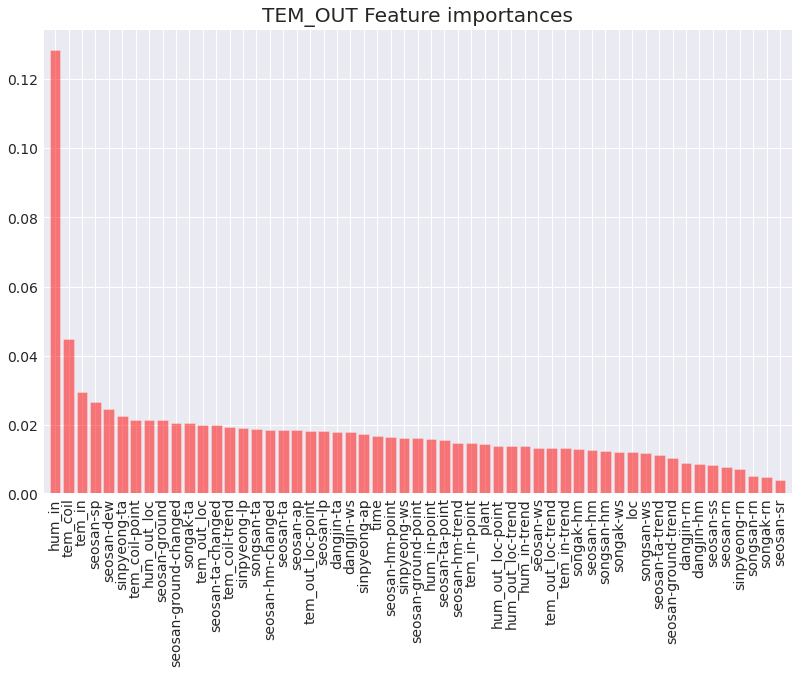

In [ ]:
# 변수 중요도 plot
sort_data_train_bin = []
for idx in indices:
  sort_data_train_bin.append(data_train_bin[idx])
sort_data_train_bin

fig = plt.figure().add_subplot()
plt.title("TEM_OUT Feature importances")
plt.bar(sort_data_train_bin, importances[indices],
        color="r", alpha=0.5, align="center")
plt.xticks(range(len(indices)), indices)
plt.xlim([-1, len(indices)])
fig.set_xticklabels(sort_data_train_bin, rotation=90)
plt.show()

## 5. 모델 저장하기

In [ ]:
###joblib.dump(model_cond, os.path.join(MODEL_PATH, "model_cond_all.pkl"))

['/content/gdrive/My Drive/weather_bigcontest/4_code/model/model_cond_all.pkl']